In [16]:
import math as m
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import numpy as np
import statsmodels.regression.linear_model as sm
import time

# length of manipulators
l1 = l2 = l3 = 7

In [2]:
## Generating dataset for training
def threeLinkManipulatorFile():
    with open('threeLink.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae']
        csv.writer(csvFile).writerow(row)
        for i in range(1, 100000):
            
            q1 = round(random.uniform(0,m.pi),2)
            q2= round(random.uniform(-m.pi, 0),2)
            q3= round(random.uniform(-m.pi/2,m.pi/2))
            
            thetae=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            xe= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            ye= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            
            
            row = [q1,q2,q3,xe,ye,thetae]
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
# threeLinkManipulatorFile()

(99999, 6)


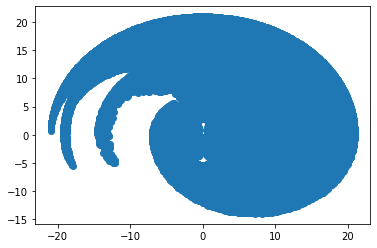


Train on 76499 samples, validate on 8500 samples
Epoch 1/50
76499/76499 [==============================] - 7s 87us/step - loss: 0.2329 - accuracy: 0.9183 - val_loss: 0.0818 - val_accuracy: 0.9298
Epoch 2/50
76499/76499 [==============================] - 6s 83us/step - loss: 0.0600 - accuracy: 0.9338 - val_loss: 0.0509 - val_accuracy: 0.9408
Epoch 3/50
76499/76499 [==============================] - 6s 83us/step - loss: 0.0468 - accuracy: 0.9441 - val_loss: 0.0407 - val_accuracy: 0.9485
Epoch 4/50
76499/76499 [==============================] - 7s 86us/step - loss: 0.0396 - accuracy: 0.9510 - val_loss: 0.0335 - val_accuracy: 0.9579
Epoch 5/50
76499/76499 [==============================] - 6s 83us/step - loss: 0.0356 - accuracy: 0.9551 - val_loss: 0.0328 - val_accuracy: 0.9605
Epoch 6/50
76499/76499 [==============================] - 7s 87us/step - loss: 0.0328 - accuracy: 0.9587 - val_loss: 0.0305 - val_accuracy: 0.9608
Epoch 7/50
76499/76499 [==============================] - 8s 105us/s

In [3]:
## Visualising generated dataset
data=pd.read_csv('threeLink.csv')
print(data.shape)
plt.scatter(data['xe'],data['ye'])
plt.show()

# splitting training and testing dataset
x = data.iloc[:,3:].values
y =data.iloc[:,0:3].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

#model
classifier = Sequential()
classifier.add(Dense(units = 3,input_dim = 3,kernel_initializer = 'uniform'))
#classifier.add(keras.layers.Dropout(0.2))

classifier.add(Dense(units = 100,kernel_initializer = 'uniform',activation = 'relu'))
#classifier.add(keras.layers.Dropout(0.2))
classifier.add(Dense(units = 3,kernel_initializer = 'uniform',activation='linear'))
classifier.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError(),metrics=['accuracy'])

#training model
history=classifier.fit(x_train,y_train ,epochs=50, validation_split=0.1, shuffle=True)

#Evaluating model on testing data 
print('Testing the model:\n')
test_loss, test_acc = classifier.evaluate(x_test, y_test)

print('\nTesting Loss = ', test_loss) 
print('Testing Accuracy = ', test_acc)

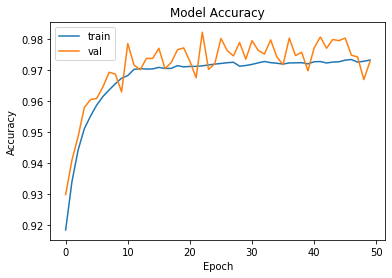

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.figure(figsize=(22,22))
# plt.show()
# plt.savefig('NN-Model Accuracy.png')

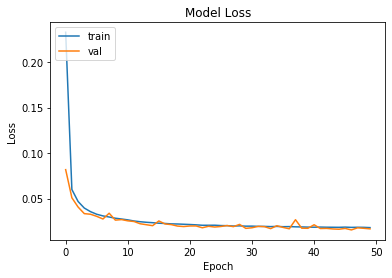

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.show()
# plt.savefig('NN-Model Loss.png')

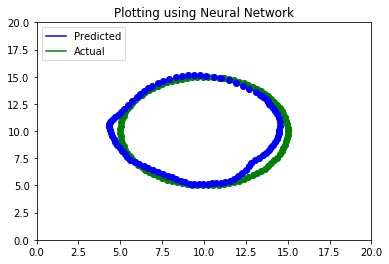

In [6]:
## trying to plot "Circle"
def circleFile():
    with open('circle.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)
        Xc = 10
        Yc = 10
        r = 5
        data_points =100
        points = np.linspace(0,360,num =data_points)
        for p in points:
            i=Xc + r*m.cos(np.radians(p))
            j=Yc + r*m.sin(np.radians(p))
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            #plt.xlim([0,20])
            #plt.ylim([0,20])
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
                
    csvFile.close()
    
circleFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'circle.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,20])
    plt.ylim([0,20])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
    
plt.plot(20, 20, 'b', label='Predicted')
plt.plot(20, 20, 'g', label='Actual')
plt.title('Plotting using Neural Network')
plt.legend(loc='upper left')
# plt.savefig('CirclePlot-NN.png')

In [7]:
from sklearn.metrics import mean_squared_error

def getPerformanceModel(filename):
    data=pd.read_csv(filename)

    X_true=data['xe']
    X_pred=data['t1']
    rmse_x=mean_squared_error(X_true,X_pred)

    Y_true=data['ye']
    Y_pred=data['t2']
    rmse_y=mean_squared_error(Y_true,Y_pred) 

    print('\nrmse in x = ', rmse_x) 
    print('rmse in y = ', rmse_y)

    ## adjusted rsquared test
    regressor_OLS = sm.OLS(endog = X_true, exog = X_pred).fit() 
    print(regressor_OLS.rsquared_adj)
    regressor_OLS = sm.OLS(endog = Y_true, exog = Y_pred).fit() 
    print(regressor_OLS.rsquared_adj) 

In [8]:
## Performance of Model for Circle
getPerformanceModel('circle.csv')


rmse in x =  0.32620924116184896
rmse in y =  0.1524492217973024
0.9983439764968816
0.9987070212319893


### Plotting "MANIT"

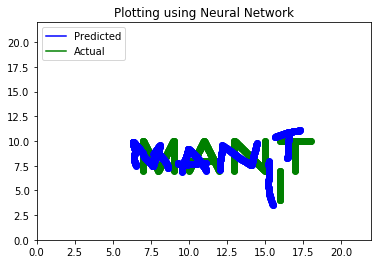

In [9]:
## trying to plot "MANIT"   

def manitFile():
  with open('manit.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)

        # for M
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 7
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(7,8,100)
        for i in arr:
            j= -3*i + 31
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(8,9,100)
        for i in arr:
            j= 3*i - 17
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 9
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for A
        arr=np.linspace(10,11,100)
        for i in arr:
            j = 3*i - 23
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        arr=np.linspace(11,12,100)
        for i in arr:
            j= -3*i + 43
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(10,12,100)
        for i in arr:
            j = 8
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        # for N
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 13
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        arr=np.linspace(13,15,100)
        for i in arr:
            j = -1.5*i + 29.5
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 15
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)


        # for I
        arr=np.linspace(4,7,100)
        for j in arr:
            i= 16
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        # for T
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 17
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
        arr=np.linspace(16,18,100)
        for i in arr:
            j=10
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

  csvFile.close()
        
    
manitFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'manit.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,22])
    plt.ylim([0,22])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1
    
plt.plot(20, 20, 'b', label='Predicted')
plt.plot(20, 20, 'g', label='Actual')
plt.title('Plotting using Neural Network')
plt.legend(loc='upper left')
# plt.savefig('ManitPlot-NN.png')

In [10]:
## Performance of Model for "MANIT"
getPerformanceModel('manit.csv')


rmse in x =  0.5166037316757317
rmse in y =  0.25219624009324015
0.999464829041273
0.9967417968149385


### Plotting "ROBOT"

In [11]:
def makeCircle(Xcentre, Ycentre, radius, start, end, csvFile):
    Xc = Xcentre
    Yc = Ycentre
    r = radius
    data_points =100
    points = np.linspace(start,end,num =data_points)
    for p in points:
        i=Xc + r*m.cos(np.radians(p))
        j=Yc + r*m.sin(np.radians(p))
        theta=m.degrees(m.atan(j/i))
        new_x=np.array([[i, j, theta]])
        new_y=classifier.predict(new_x)
        q1=float(new_y[0][0])
        q2=float(new_y[0][1])
        q3=float(new_y[0][2])

        t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
        t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
        t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

        row = [q1,q2,q3,i,j,theta,t1,t2,t3]
        plt.plot(i,j,'go')
        csv.writer(csvFile).writerow(row)

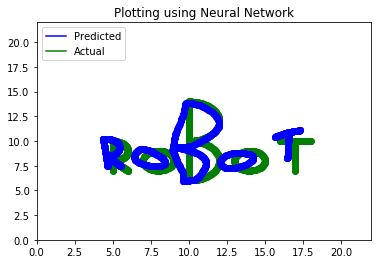

In [12]:
## trying to plot "ROBOT"   

def robotFile():
  with open('robot.csv', 'w') as csvFile:
        row = ['q1','q2','q3','xe','ye','thetae','t1','t2','t3']
        csv.writer(csvFile).writerow(row)

        # for R
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 5
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        makeCircle(5, 9, 1, -90, 90, csvFile)

        arr=np.linspace(5,6,100)
        for i in arr:
            j= -i + 13
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])
            
            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)
            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)

        

        # for O
        
        makeCircle(8, 8, 1, 0, 360, csvFile)

        # for B
        
        arr=np.linspace(6,14,100)
        for j in arr:
            i= 10
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
        
        makeCircle(10, 8, 2, -90, 90, csvFile)
        
        makeCircle(10, 12, 2, -90, 90, csvFile)
        

        # for O
        
        makeCircle(14, 8, 1, 0, 360, csvFile)
        
        # for T
        arr=np.linspace(7,10,100)
        for j in arr:
            i= 17
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
            
        arr=np.linspace(16,18,100)
        for i in arr:
            j=10
            theta=m.degrees(m.atan(j/i))
            new_x=np.array([[i, j, theta]])
            new_y=classifier.predict(new_x)
            q1=float(new_y[0][0])
            q2=float(new_y[0][1])
            q3=float(new_y[0][2])

            t3=round(m.degrees(q1)+m.degrees(q2)+m.degrees(q3),2)
            t1= round(l1*m.cos(q1)+ l2*m.cos(q1+q2)+ l3*m.cos(q1+q2+q3),2)
            t2= round(l1*m.sin(q1)+ l2*m.sin(q1+q2)+ l3*m.sin(q1+q2+q3),2)

            row = [q1,q2,q3,i,j,theta,t1,t2,t3]
            plt.plot(i,j,'go')
            csv.writer(csvFile).writerow(row)
  csvFile.close()
        
    
robotFile()

def plot_point(point, angle, length):
    x, y = point
    endy = y + length * m.sin(angle)
    endx = x + length * m.cos(angle)
    #plt.xlim([0,6])
    #plt.ylim([0,6])
    #plt.plot([x, endx], [y, endy])
    return endx,endy

filename = 'robot.csv'
data = np.loadtxt(filename, delimiter=",", skiprows=1)


ang1 = [row[0] for row in data]
ang2 = [row[1] for row in data]
ang3 = [row[2] for row in data]

point = [0,0]
c = 1
images = []
for i in range(len(data)):
    #fileName = 'Figure/circle' + str(c) + '.png'
    point = plot_point([0,0],ang1[i],l1)
    point = plot_point(point,ang1[i]+ang2[i],l2)
    point=plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    plt.xlim([0,22])
    plt.ylim([0,22])
    plt.plot(point[0],point[1],'bo')
    #plot_point(point,ang1[i]+ang2[i]+ang3[i],l3)
    #plt.savefig(fileName)
    #images.append(img.imread(fileName))
    #c = c+1

# plt.figure(figsize=(22,20))
plt.plot(20, 20, 'b', label='Predicted')
plt.plot(20, 20, 'g', label='Actual')
plt.title('Plotting using Neural Network')
plt.legend(loc='upper left')
# plt.savefig('RobotPlot-NN.png')

In [13]:
## Performance of Model for "Robot"
getPerformanceModel('robot.csv')


rmse in x =  0.3940600705156014
rmse in y =  0.35200264301175443
0.9990908258979435
0.9961288157691981


In [38]:
def plotFromFile(filename, timeTaken):
    data = np.loadtxt(filename, delimiter=",", skiprows=1)
    
    x = [row[3:6].tolist() for row in data]
    
    pred_points = []
    
    for coord in x:
        plt.plot(coord[0], coord[1], 'go')
        
        new_x=np.array([[coord[0], coord[1], coord[2]]])
        now = time.time()

        new_y=classifier.predict(new_x)

        later = time.time()
        
        timeTaken += later - now
        
        q1=float(new_y[0][0])
        q2=float(new_y[0][1])
        q3=float(new_y[0][2])
        
        point = plot_point([0,0],q1,l1)
        point = plot_point(point,q1+ q2,l2)
        point = plot_point(point,q1+ q2 + q3,l3)
        
        plt.xlim([0,20])
        plt.ylim([0,20])
        
        pred_points.append([point[0],point[1]])
#         plt.plot(point[0],point[1],'bo')

    for point in pred_points:
        plt.plot(point[0],point[1],'bo')
    
    plt.plot(20, 20, 'b', label='Predicted')
    plt.plot(20, 20, 'g', label='Actual')
    plt.title('Plotting using Neural Network')
    plt.legend(loc='upper left')
    
    return timeTaken
    # plt.savefig('CirclePlot-NN.png')

Time Taken By NN for IK to Trace 'MANIT': 1.2794907093048096 sec


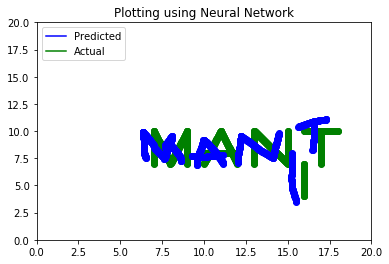

In [46]:
timeTaken = plotFromFile('manit.csv', 0)
print("Time Taken By NN for IK to Trace 'MANIT':", timeTaken, "sec")

Time Taken By NN for IK to Trace 'ROBOT': 0.9808194637298584 sec


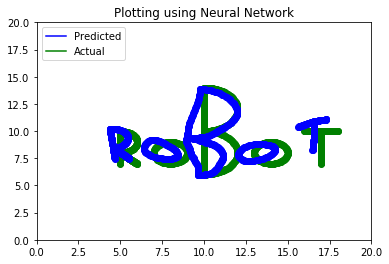

In [47]:
timeTaken = plotFromFile('robot.csv', 0)
print("Time Taken By NN for IK to Trace 'ROBOT':", timeTaken, "sec")

Time Taken By NN for IK to Trace 'CIRCLE': 0.08733868598937988 sec


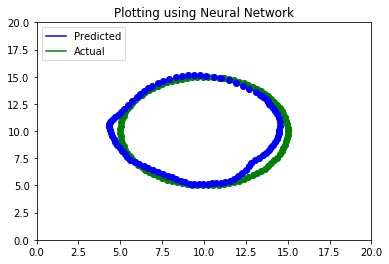

In [48]:
timeTaken = plotFromFile('circle.csv', 0)
print("Time Taken By NN for IK to Trace 'CIRCLE':", timeTaken, "sec")